In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
dataset= pd.read_csv("assets/data/audio_dataset.csv", header= None)
dataset.head()

,0,1,2
0,-353.54886,90.192770,slider_abnormal
1,-348.44100,62.182060,slider_abnormal
2,-380.06805,69.027790,slider_abnormal
3,-360.74063,71.080220,slider_abnormal
4,-337.14594,99.502205,slider_abnormal


In [4]:
dataset.columns= ['mfcc1','mfcc2','class']

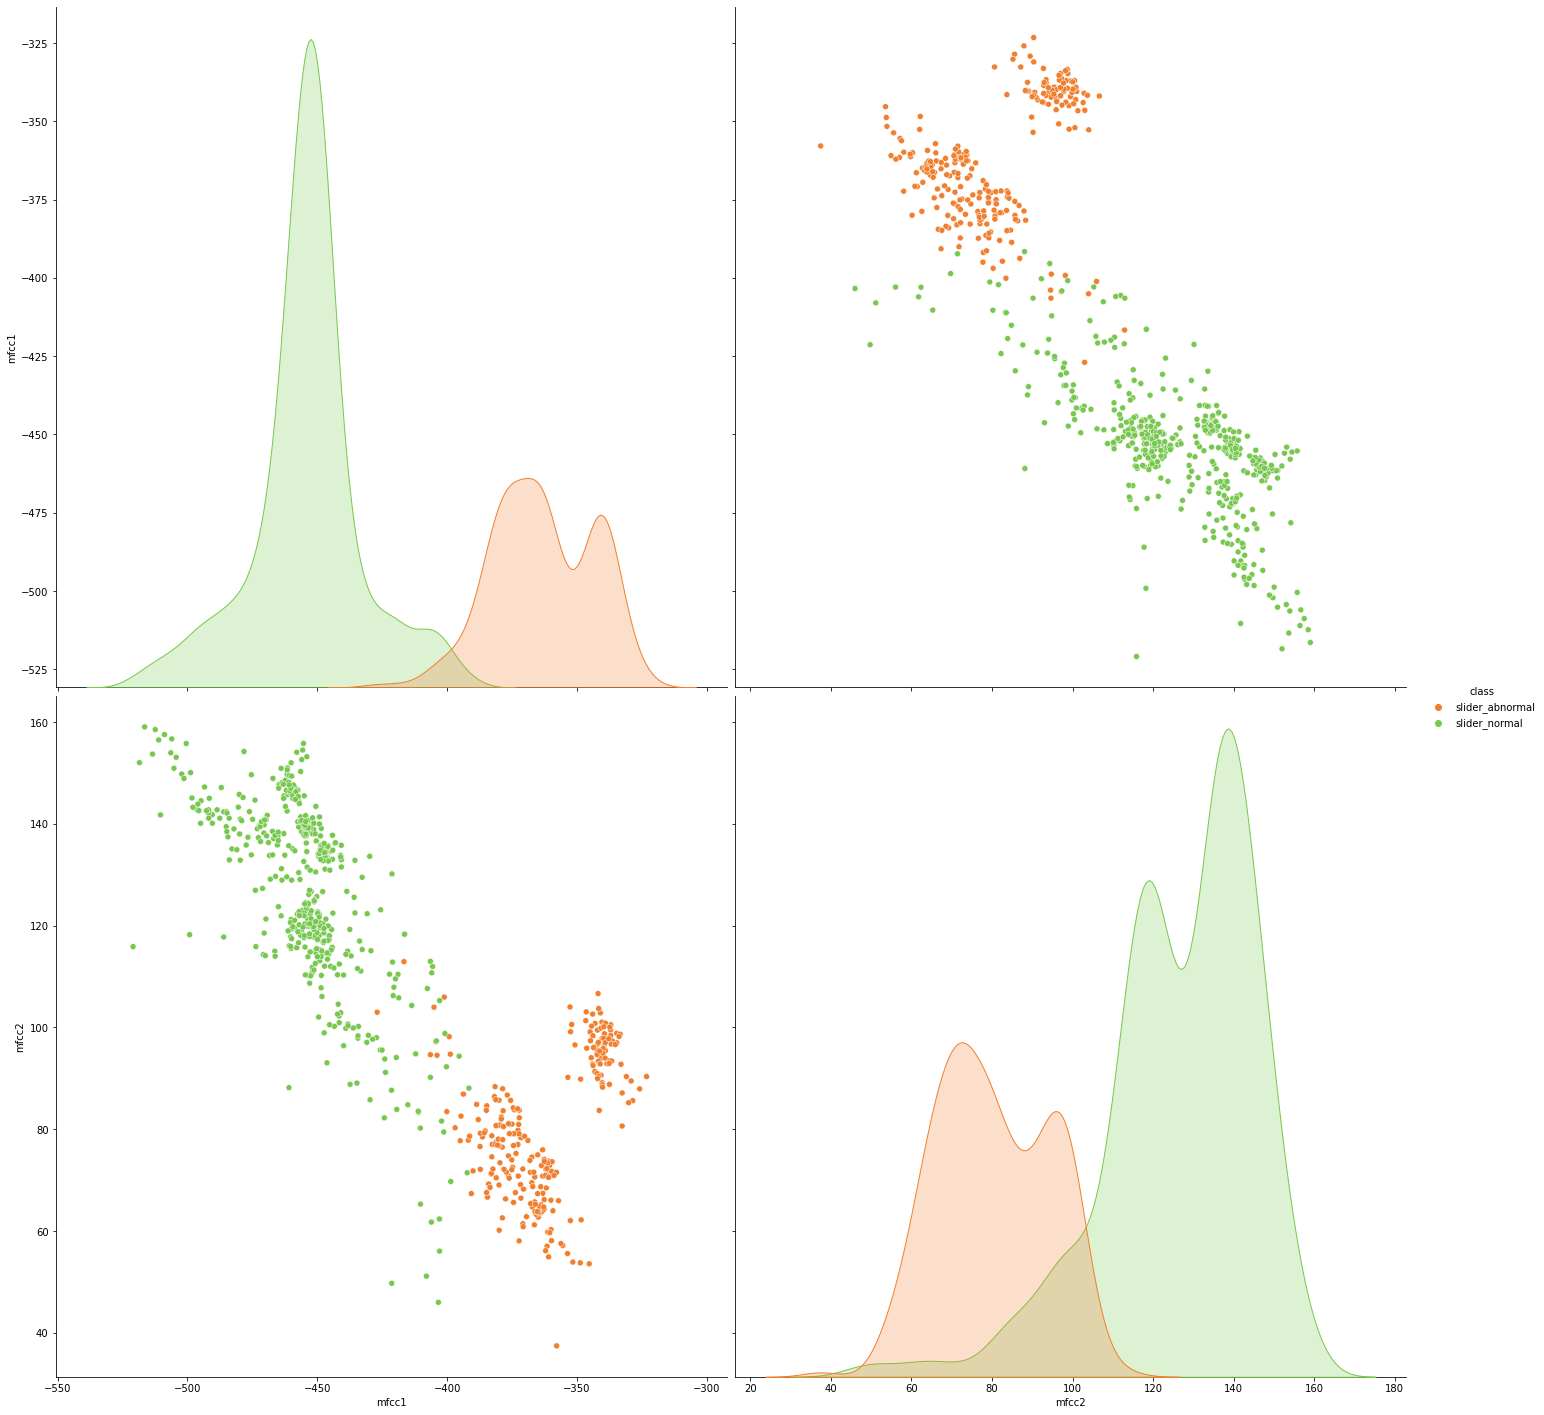

In [7]:
sns.pairplot(dataset, hue = 'class', palette=['#F08030', '#78C850'], height= 10)

In [9]:
data_matrics = dataset.drop('class', axis = 1)
data_matrics.head()

,mfcc1,mfcc2
0,-353.54886,90.192770
1,-348.44100,62.182060
2,-380.06805,69.027790
3,-360.74063,71.080220
4,-337.14594,99.502205


In [10]:
data_matrics_normalized=(data_matrics-data_matrics.mean())/data_matrics.std()

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(data_matrics_normalized)
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
# data_matrics = data_matrics.join(cluster_labels.to_frame())
# data_matrics.tail()

In [13]:
data_matrics_kmean = data_matrics_normalized.join(cluster_labels.to_frame())

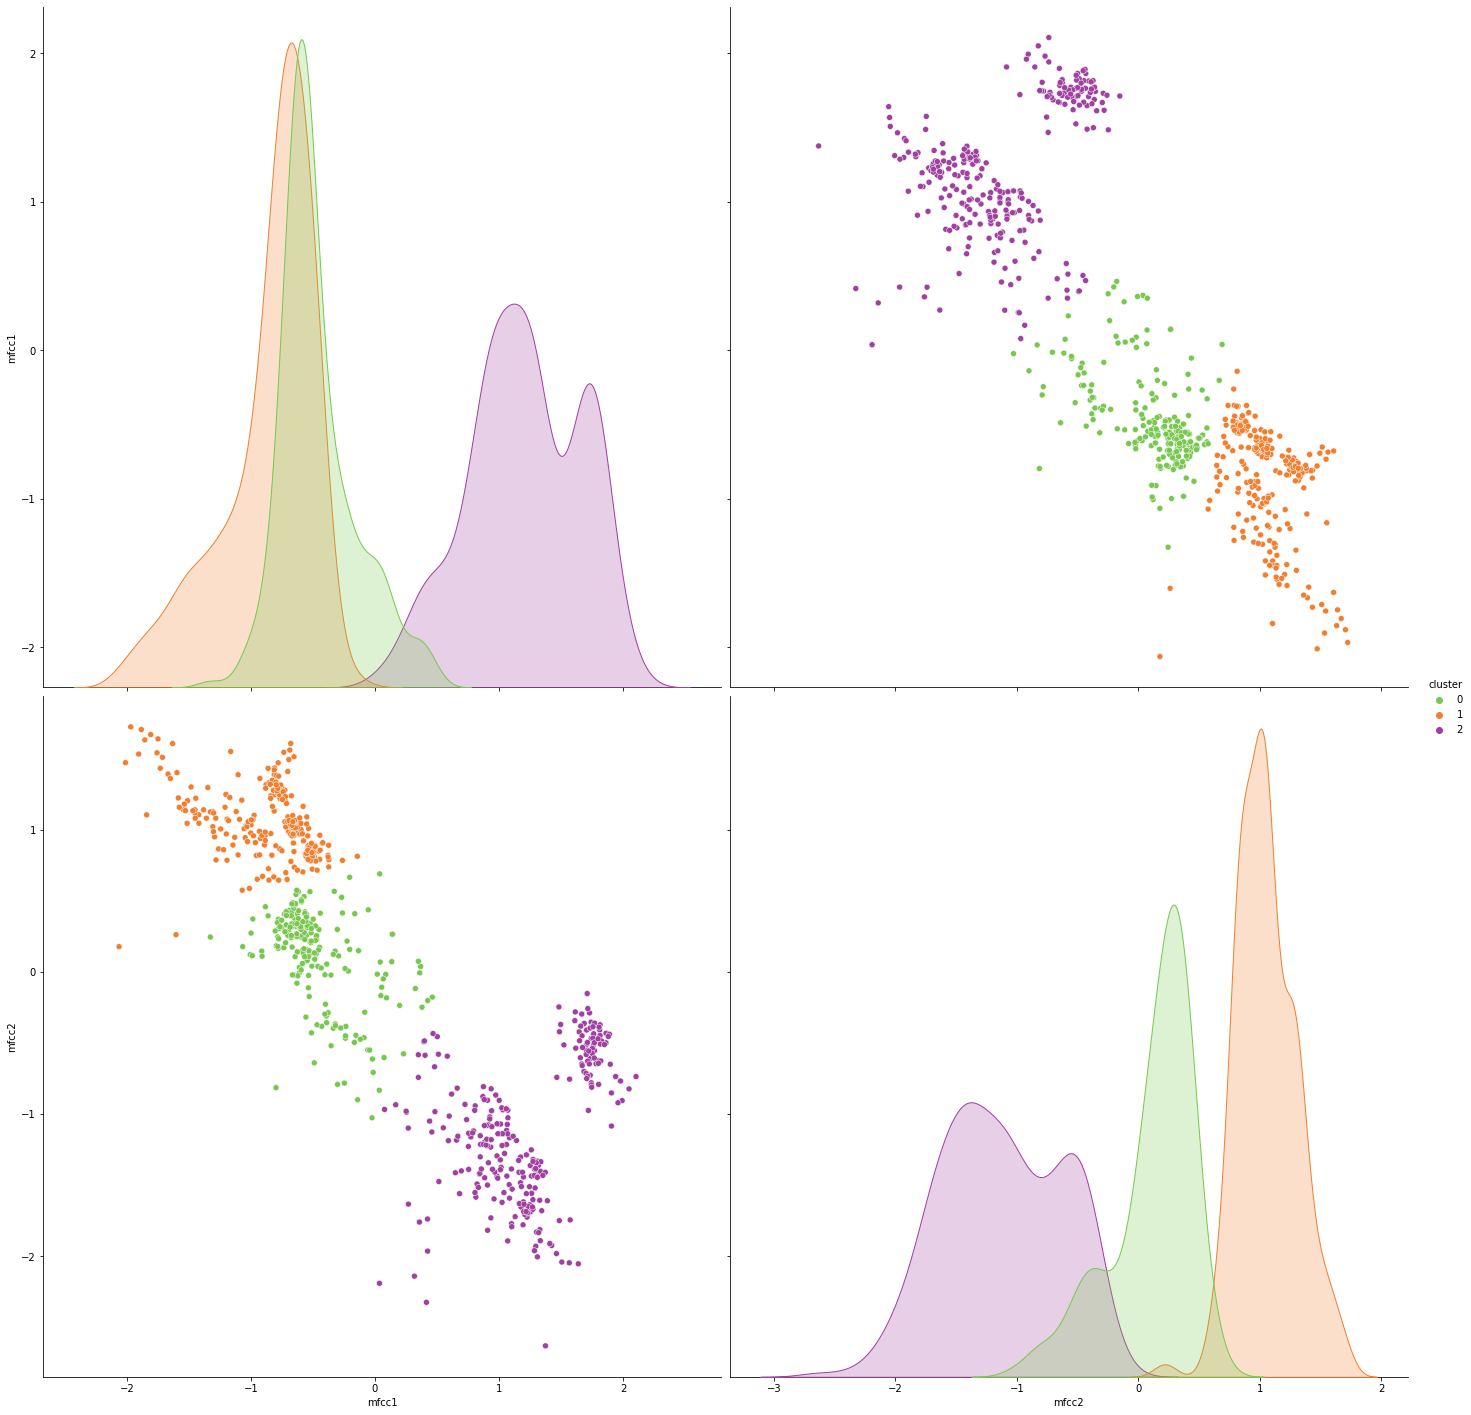

In [14]:
sns.pairplot(data_matrics_kmean, hue = 'cluster', palette=['#78C850', '#F08030','#A040A0'], height= 10)

In [15]:
validation_dataset= pd.read_csv("assets/data/validation_dataset.csv", header= None)
validation_dataset=validation_dataset.iloc[:,0:2]
validation_dataset=(validation_dataset-validation_dataset.mean())/validation_dataset.std()

In [16]:
prediction=kmeans.predict(validation_dataset)
prediction

/home/admin1/anaconda3/envs/monitor_env/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [21]:
from sklearn.cluster import SpectralClustering


In [22]:
SpecCluster= SpectralClustering(n_clusters=3, assign_labels='discretize')
SpecCluster.fit(data_matrics_normalized)
cluster_labels = pd.Series(SpecCluster.labels_, name='cluster')

In [24]:
cluster_labels.value_counts()

1    468
0    208
2     80
Name: cluster, dtype: int64

In [25]:
data_matrics_spec = data_matrics_normalized.join(cluster_labels.to_frame())

In [26]:
data_matrics_spec

,mfcc1,mfcc2,cluster
0,1.466760,-0.742954,2
1,1.574469,-1.745968,0
2,0.907548,-1.500835,0
3,1.315106,-1.427341,0
4,1.812649,-0.409599,2
...,...,...,...
751,-0.884595,0.982949,1
752,-0.484903,0.088508,1
753,-0.538806,0.789771,1
754,-1.536183,1.180056,1


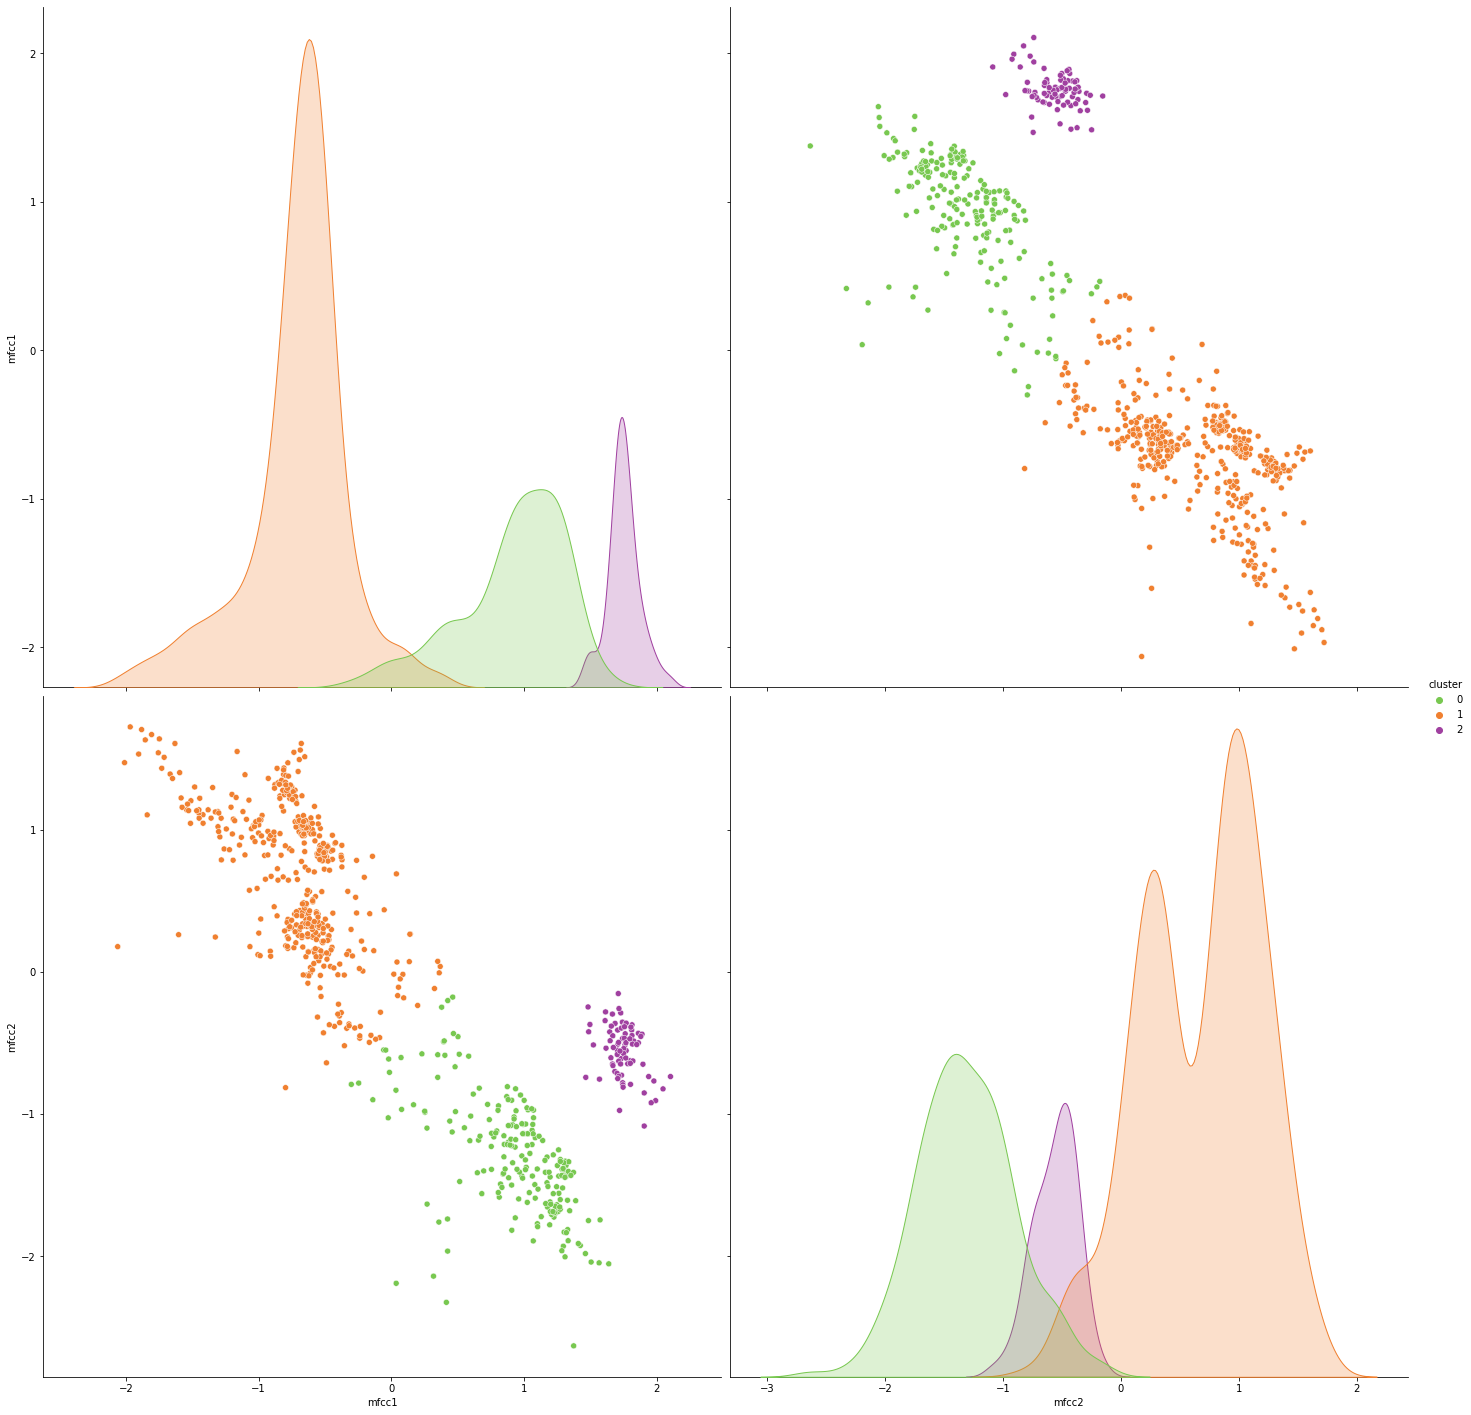

In [27]:
sns.pairplot(data_matrics_spec, hue = 'cluster', palette=['#78C850', '#F08030', '#A040A0'], height= 10)

In [30]:
from sklearn.cluster import AgglomerativeClustering

AggCluster= AgglomerativeClustering(n_clusters=3)
AggCluster.fit(data_matrics_normalized)
cluster_labels = pd.Series(AggCluster.labels_, name='cluster')
data_metrics_AggCluster = data_matrics_normalized.join(cluster_labels.to_frame())

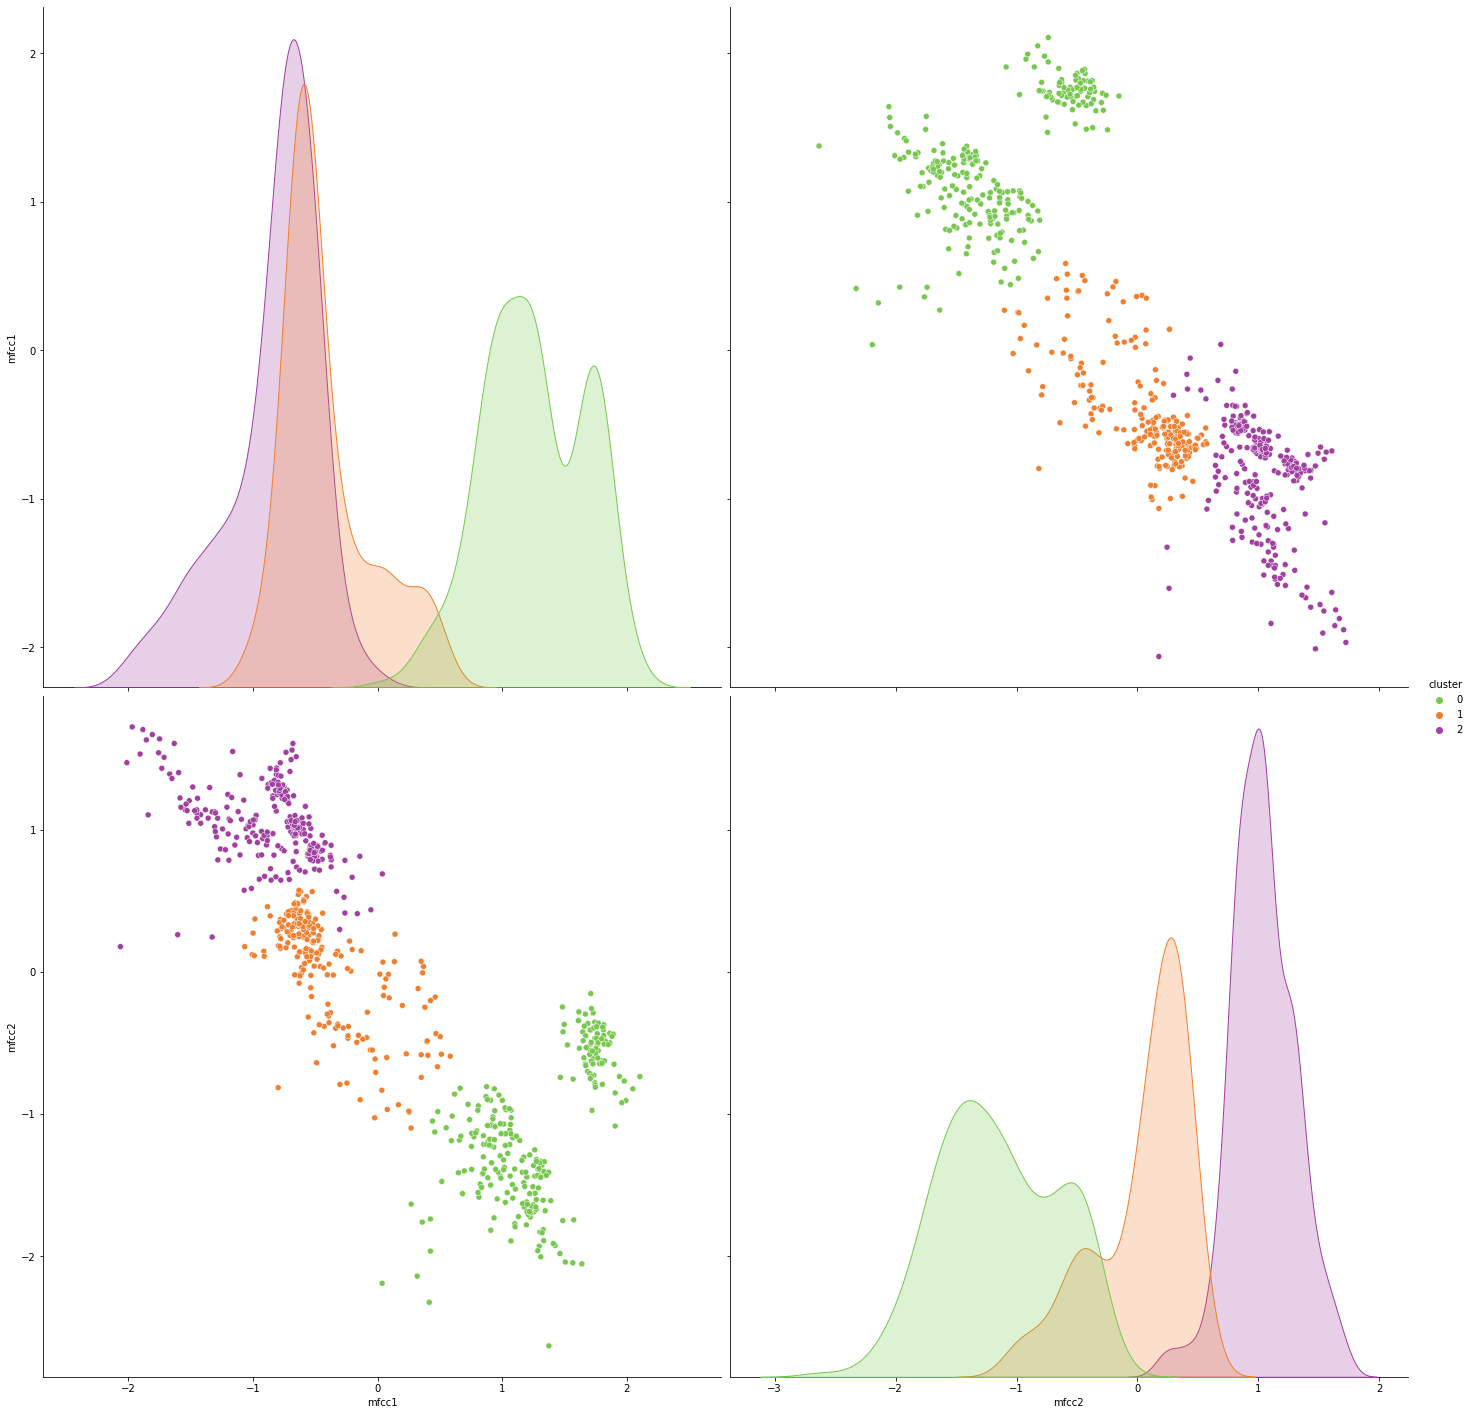

In [32]:
sns.pairplot(data_metrics_AggCluster, hue = 'cluster', palette=['#78C850', '#F08030', '#A040A0'], height= 10)

In [51]:
from sklearn.cluster import MeanShift

AffProp= MeanShift()
AffProp.fit(data_matrics_normalized)
cluster_labels = pd.Series(AffProp.labels_, name='cluster')
data_metrics_AffProp = data_matrics_normalized.join(cluster_labels.to_frame())

In [52]:
cluster_labels.value_counts()

0    468
1    288
Name: cluster, dtype: int64

<AxesSubplot:title={'center':'Agglomerative Clustering'}, xlabel='mfcc1', ylabel='mfcc2'>

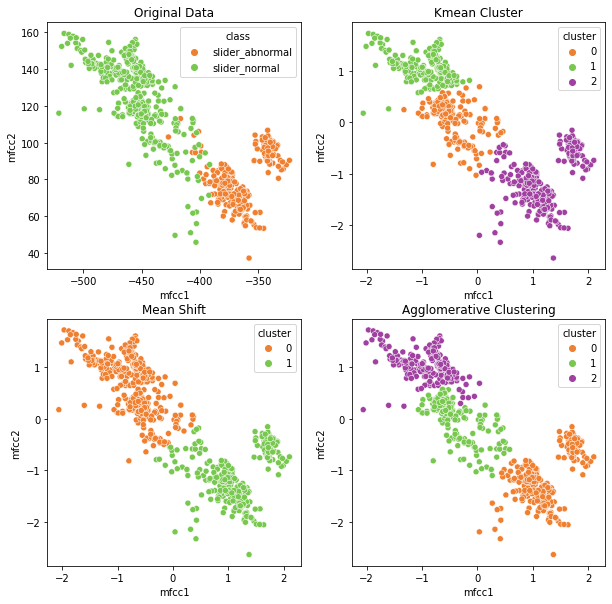

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0,0].title.set_text("Original Data")
axes[0,1].title.set_text("Kmean Cluster")
axes[1,0].title.set_text("Mean Shift")
axes[1,1].title.set_text("Agglomerative Clustering")
sns.scatterplot(ax= axes[0,0], data=dataset, x="mfcc1", y="mfcc2",hue = 'class', palette=['#F08030', '#78C850'])
sns.scatterplot(ax= axes[0,1], data=data_matrics_kmean, x="mfcc1", y="mfcc2",hue = 'cluster', palette=['#F08030', '#78C850','#A040A0'])
sns.scatterplot(ax= axes[1,0], data=data_metrics_AffProp, x="mfcc1", y="mfcc2",hue = 'cluster', palette=['#F08030', '#78C850'])
sns.scatterplot(ax= axes[1,1], data=data_metrics_AggCluster, x="mfcc1", y="mfcc2",hue = 'cluster', palette=['#F08030', '#78C850', '#A040A0'])

In [22]:
# iner=[]
# for k in range(1,10):
#     kmeans = KMeans(n_clusters=k, init='k-means++').fit(data_matrics)
#     iner.append(kmeans.inertia_)
#     cluster_labels = pd.Series(kmeans.labels_, name='cluster')

In [55]:


# plt.plot(range(1,10), iner)
# plt.show()